---
# Conversion of Some Methods from MIXR to Python Language
---

# Dependences

In [1]:
import numpy
import math

---
# Constants and Methods for Converting Distance Measurement Units
These constants and methods are equivalent to those of the file distance_utils.cpp of MIXR.

In [2]:
# Constants for conversion between distances
FT2M =  0.30480        # Feet => Meters
M2FT = (1.0 / FT2M)    # Meters => Feet
IN2M =  0.02540        # Inches => Meters
M2IN =  (1.0 / IN2M)   # Meters => Inches
NM2M = 1852.0          # Nautical Miles => Meters
M2NM = (1.0 / NM2M)    # Meters => Nautical Miles
NM2FT = (NM2M * M2FT)  # Nautical Miles => Feet
FT2NM = (1.0 / NM2FT)  # Feet => Nautical Miles
SM2M = 1609.344        # Statue Miles => Meters
M2SM = (1.0 / SM2M)    # Meters => Statue Miles
SM2FT = 5280.0         # Statue Miles => Feet
FT2SM = (1.0 / SM2FT)  # Feet => Statue Miles
KM2M = 1000.0          # Kilometers => Meters
M2KM = (1.0 / KM2M)    # Meters => Kilometers
CM2M = 0.01            # Centimeters => Meters
M2CM = (1.0 / CM2M)    # Meters => Centimeters
UM2M = 0.000001        # Micrometer (Micron) => Meters
M2UM = (1.0 / UM2M)    # Meters => Micrometer (Micron)

# Methods for conversion between distances
def MetersToMicroMeters(v):
    return v * M2UM

def MicroMetersToMeters(v):
    return v * UM2M

def MetersToCentiMeters(v):
    return v * M2CM

def CentiMetersToMeters(v):
    return v * CM2M

def MetersToKiloMeters(v):
    return v * M2KM

def KiloMetersToMeters(v):
    return v * KM2M

def MetersToInches(v):
    return v * M2IN

def InchesToMeters(v):
    return v * IN2M

def MetersToFeet(v):
    return v * M2FT

def FeetToMeters(v):
    return v * FT2M

def KiloMetersToNauticalMiles(v):
    return (v * KM2M) * M2NM

def NauticalMilesToKiloMeters(v):
    return (v * NM2M) * M2KM

def KiloMetersToStatuteMiles(v):
    return (v * KM2M) * M2SM

def StatuteMilesToKiloMeters(v):
    return (v * SM2M) * M2KM

def NauticalMilesToStatuteMiles(v):
    return (v * NM2M) * M2SM

def StatuteMilesToNauticalMiles(v):
    return (v * SM2M) * M2NM

---
# Constants and Methods for Converting Angle Measurement Units
These constants and methods are equivalent to those of the file angle_utils.cpp of MIXR.

In [3]:
# Constants for conversion between angles
D2SC  = 0.0055555555555556    # Degrees => Semicircles
SC2D  = 180.0                 # Semicircles => Degrees
R2SC  = 0.3183098861837906    # Radians => Semicircles
SC2R  = math.pi               # Semicircles => Radians
R2DCC = (180.0 / math.pi)     # Radians => Degrees
D2RCC = (math.pi / 180.0)     # Degrees => Radians

# Methods for conversion between angles
def degreesToRadians(v):
    return (v * D2SC) * SC2R

def degreesToSemicircles(v):
    return v * D2SC

def radiansToDegrees(v):
    return (R2SC * v) * SC2D

def radiansToSemicircles(v):
    return v * R2SC

def semicirclesToRadians(v):
    return v * SC2R

def semicirclesToDegrees(v):
    return v * SC2D

# Methods for operation between angles
# Angle end-point check, in degrees (keeps angles within the range: -180 <= x <= 180)
def aepcdDeg(x):
    y = 0.0
    
    if (x < -180.0) or (x > 180.0):
        y = math.fmod(x, 360.0)
        if (y >  180.0):
            y = y - 360.0
        if (y < -180.0):
            y = y + 360.0
        return y
    else:
        if (x == -180.0):
            return 180.0
        else:
            return x

# Angle end-point check, in radians (keeps angles within the range: -180 <= x <= 180)
def aepcdRad(x):
    y = 0.0
    
    if (x < -math.pi) or (x > math.pi):
        y = math.fmod(x, (2.0 * math.pi))
        if (y >  math.pi):
            y = y - (2.0 * math.pi)
        if (y < -math.pi):
            y = y + (2.0 * math.pi)
        return y
    else:
        if (x == -math.pi):
            return math.pi
        else:
            return x

In [4]:
math.pi

3.141592653589793

The method aepcdDeg keeps an angle within the range -180.0 to 180.0 as presented in the figure bellow.

In the example of this figure, the angle of 225 degrees is converted to -135 degrees through aepcdDeg.

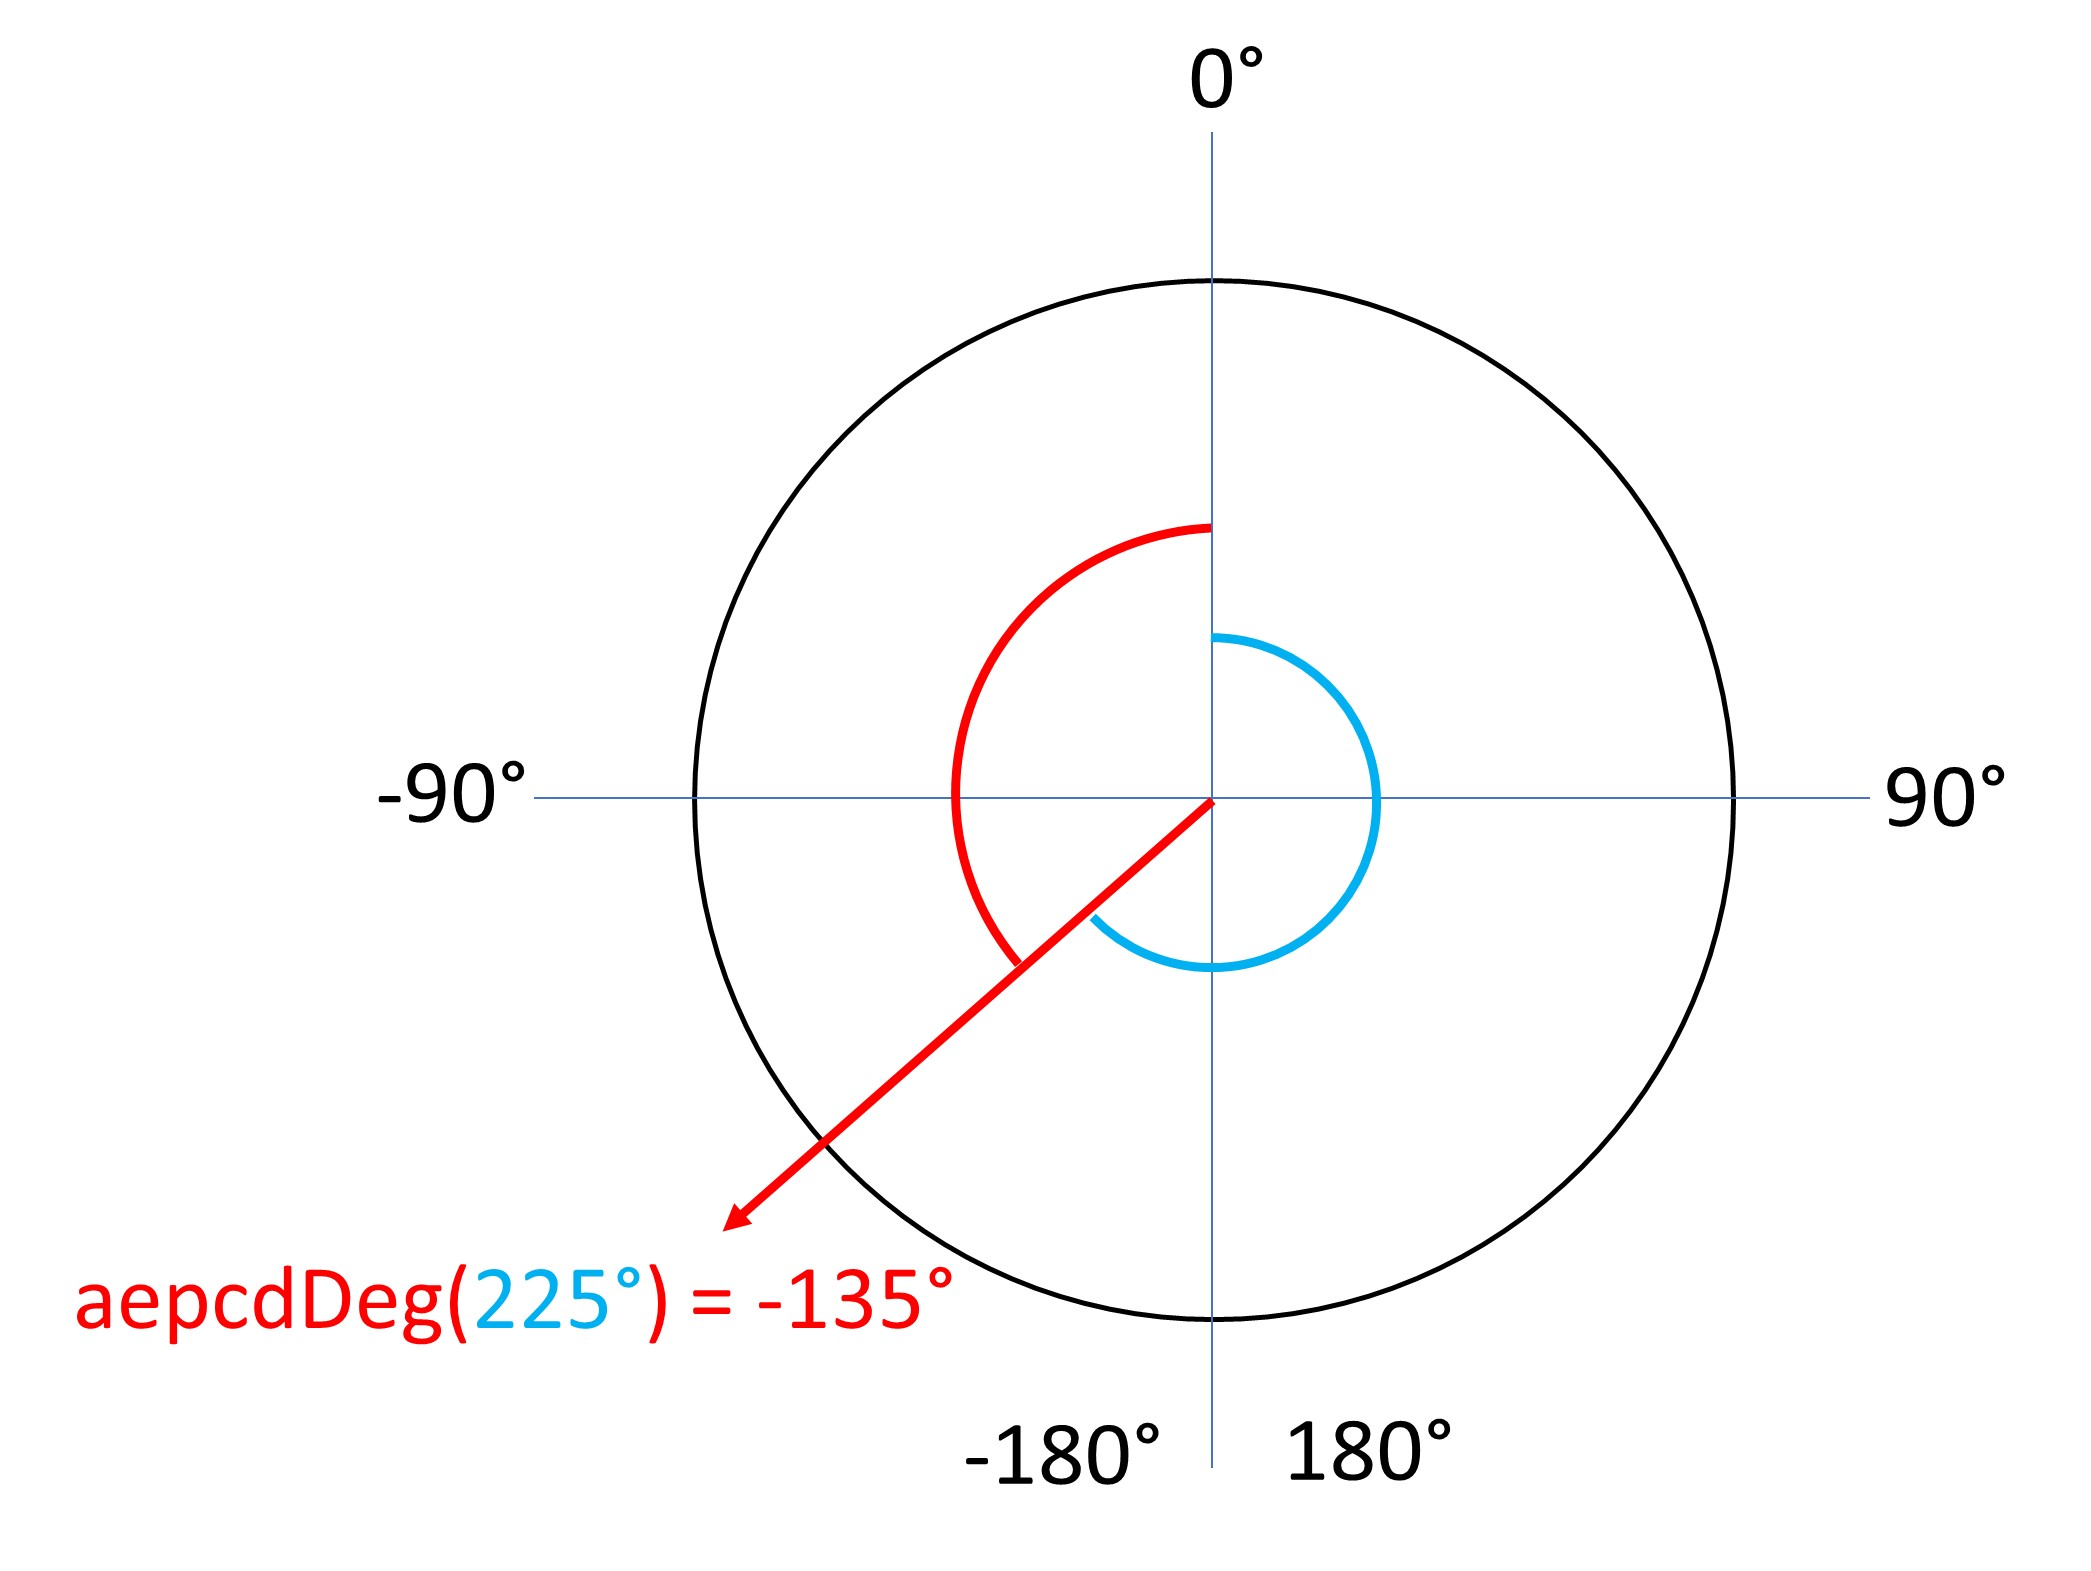

In [5]:
aepcdDeg(225)

-135.0

---
# Numerical Manipulation Methods
These methods are equivalent to those of the file arquivo math_utils.cpp of MIXR.

In [6]:
# alimd -- limits the value of x to +/-limit.
def alimd(x , limit):
    if (x > limit):
        return limit
    else:
        if (x < -limit):
            return (-limit)
        else:
            return x

In [7]:
alimd(-17,11)

-11

---
# Data from Different Models of the Earth
Data from 22 Earth surface models are stored in the array earthModelData. Each cell of this array corresponds to a type of model and has the following information: semi major axis (a), in meters; and flattening (f). 

In [8]:
earthModelData = [
                    # wgs84 -> indexEarthModel = 0
                    [6378137.0, 1.0 / 298.257223563],
    
                    # airy -> indexEarthModel = 1
                    [6377563.396, 1.0 / 299.3249646] ,
                    
                    # australianNational -> indexEarthModel = 2
                    [6378160.0, 1.0 / 298.25],
    
                    # bessel1841 -> indexEarthModel = 3
                    [6377397.155, 1.0 / 299.1528128],
    
                    # clark1866 -> indexEarthModel = 4
                    [678206.4, 1.0 / 294.9786982],
    
                    # clark1880 -> indexEarthModel = 5
                    [6378249.145, 1.0 / 293.465],
    
                    # everest -> indexEarthModel = 6
                    [6377276.345, 1.0 / 300.8017],
    
                    # fischer1960 -> indexEarthModel = 7
                    [6378166.0, 1.0 / 298.3],
    
                    # fischer1968 -> indexEarthModel = 8
                    [6378150.0, 1.0 / 298.3],
    
                    # grs1967 -> indexEarthModel = 9
                    [6378160.0, 1.0 / 298.247167427],
    
                    # grs1980 -> indexEarthModel = 10
                    [6378137.0, 1.0 / 298.257222101],
    
                    # helmert1906 -> indexEarthModel = 11
                    [6378200.0, 1.0 / 298.3],
    
                    # hough -> indexEarthModel = 12
                    [6378270.0, 1.0 / 297.0],
    
                    # international -> indexEarthModel = 13
                    [6378388.0, 1.0 / 297.0],
    
                    # kravosky -> indexEarthModel = 14
                    [6378245.0, 1.0 / 298.3],
    
                    # modAiry -> indexEarthModel = 15
                    [6377340.189, 1.0 / 299.3249646],
    
                    # modEverest -> indexEarthModel = 16
                    [6377304.063, 1.0 / 300.8017],
    
                    # modFischer -> indexEarthModel = 17
                    [6378155.0, 1.0 / 298.3],
    
                    # southAmerican1969 -> indexEarthModel = 18
                    [6378160.0, 1.0 / 298.25],
    
                    # wgs60 -> indexEarthModel = 19
                    [6378165.0, 1.0 / 298.3],
    
                    # wgs66 -> indexEarthModel = 20
                    [6378145.0, 1.0 / 298.25],
    
                    # wgs72 -> indexEarthModel = 21
                    [6378135.0, 1.0 / 298.26]
                ]

In [9]:
earthModelData

[[6378137.0, 0.0033528106647474805],
 [6377563.396, 0.0033408506414970775],
 [6378160.0, 0.003352891869237217],
 [6377397.155, 0.003342773182174806],
 [678206.4, 0.0033900753040885176],
 [6378249.145, 0.003407561378699334],
 [6377276.345, 0.003324449296662885],
 [6378166.0, 0.003352329869259135],
 [6378150.0, 0.003352329869259135],
 [6378160.0, 0.003352923712996414],
 [6378137.0, 0.003352810681182319],
 [6378200.0, 0.003352329869259135],
 [6378270.0, 0.003367003367003367],
 [6378388.0, 0.003367003367003367],
 [6378245.0, 0.003352329869259135],
 [6377340.189, 0.0033408506414970775],
 [6377304.063, 0.003324449296662885],
 [6378155.0, 0.003352329869259135],
 [6378160.0, 0.003352891869237217],
 [6378165.0, 0.003352329869259135],
 [6378145.0, 0.003352891869237217],
 [6378135.0, 0.003352779454167505]]

---
# gbd2ll
This function computes the destination (target) point from starting (ref) point given distance and initial bearing. 

This method considers an elliptical earth model, and it is similar to the method of the file nav_utils.cpp of MIXR.

Inputs:

    - latitude (slat) and longitude (slon) of the starting point; 
    
    - bearing (brg), in degrees, between the starting and destination points;
    
    - distance (dist) or ground range, in nautical miles (nm), between the starting and destination points; and
    
    - an index of an optional earth model (default: WGS-84 (indexEarthModel = 0)).

Outputs:

    - latitude (dlat) and longitude (dlon) of the destination point. 
    
-------------------------------------------------------------------------------------
Observation: possible values for indexEarthModel.

wgs84 -> indexEarthModel = 0

airy -> indexEarthModel = 1

australianNational -> indexEarthModel = 2

bessel1841 -> indexEarthModel = 3

clark1866 -> indexEarthModel = 4

clark1880 -> indexEarthModel = 5

everest -> indexEarthModel = 6

fischer1960 -> indexEarthModel = 7

fischer1968 -> indexEarthModel = 8

grs1967 -> indexEarthModel = 9

grs1980 -> indexEarthModel = 10

helmert1906 -> indexEarthModel = 11

hough -> indexEarthModel = 12

international -> indexEarthModel = 13

kravosky -> indexEarthModel = 14

modAiry -> indexEarthModel = 15

modEverest -> indexEarthModel = 16

modFischer -> indexEarthModel = 17

southAmerican1969 -> indexEarthModel = 18

wgs60 -> indexEarthModel = 19

wgs66 -> indexEarthModel = 20

wgs72 -> indexEarthModel = 21

In [10]:
def gbd2ll(slat, slon, brg, dist, indexEarthModel):
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize earth model parameters
    # --------------------------------------------------------------------------------------------------------------
    if ((indexEarthModel < 0) or (indexEarthModel > 21)):
        # consider the default WGS-84
        indexEarthModel = 0
    
    tempData = earthModelData[indexEarthModel]
    
    # semi major axis (a), in meters
    a = tempData[0]
    
    # flattening (f)
    f = tempData[1]
    
    # semi minor axis (b), in meters
    b = a*(1.0 - f)
    
    # eccentricity squared (e2)
    e2 = f*(2.0 - f)
    
    eemA = a * M2NM
    
    eemE2 = e2
    
    # --------------------------------------------------------------------------------------------------------------
    # convert slat, slon and brg to radians
    # --------------------------------------------------------------------------------------------------------------
    slatr = slat * D2RCC
    slonr = slon * D2RCC
    psi = aepcdDeg(brg) * D2RCC
    
    # --------------------------------------------------------------------------------------------------------------
    # transform source point about zero longitude
    # --------------------------------------------------------------------------------------------------------------
    tslatr = slatr
    
    # --------------------------------------------------------------------------------------------------------------
    # calculate Gaussian radius of curvature at source lat
    # --------------------------------------------------------------------------------------------------------------
    grad = eemA * (1.0 - ((eemE2 / 2.0) * math.cos(2.0 * tslatr))) # Gaussian radius
    
    # --------------------------------------------------------------------------------------------------------------
    # compute transformed destination lat/lon
    # --------------------------------------------------------------------------------------------------------------
    tdlatr = 0.0
    tdlonr = -slonr
    if (dist <= 10000.0):
        x = math.cos(dist / grad) * math.sin(tslatr)
        y = math.sin(dist / grad) * math.cos(tslatr) * math.cos(psi)
        tdlatr = math.asin(x + y)
        
        x = math.cos(dist / grad) - math.sin(tslatr) * math.sin(tdlatr)
        y = math.cos(tslatr) * math.cos(tdlatr)
        
        z = 0.0
        if (y != 0.0):
            z = x / y
        else:
            if (x >= 0):
                z = 1.0
            else:
                z = -1.0
        z = alimd(z, 1.0)
        
        tdlonr = math.acos(z)
        
        if( psi < 0.0 ):
            tdlonr = -tdlonr
    
    # --------------------------------------------------------------------------------------------------------------
    # retransform destination point
    # --------------------------------------------------------------------------------------------------------------
    dlatr = tdlatr
    dlonr = tdlonr + slonr
    
    # --------------------------------------------------------------------------------------------------------------
    # convert to degrees
    # --------------------------------------------------------------------------------------------------------------
    dlat0 = dlatr * R2DCC
    dlon0 = dlonr * R2DCC
            
    # --------------------------------------------------------------------------------------------------------------
    # apply ellipsoidal correction
    # --------------------------------------------------------------------------------------------------------------
    ellip = 0.00334 * math.pow( math.cos(tslatr), 2 )
    dlat0 = dlat0 - ellip * (dlat0 - slat)
    dlon0 = dlon0 + ellip * (dlon0 - slon)
    
    # --------------------------------------------------------------------------------------------------------------
    # limit check for destination longitude
    # --------------------------------------------------------------------------------------------------------------
    if (dlon0 > 180.0):
        dlon0 = dlon0 - 360.0
    else:
        if (dlon0 < -180.0):
            dlon0 = dlon0 + 360.0
    
    # --------------------------------------------------------------------------------------------------------------
    # return to caller
    # --------------------------------------------------------------------------------------------------------------
    dlat = dlat0
    dlon = dlon0
    
    return dlat, dlon

In [11]:
def test_varying_latitude():
        print("Testing varying latitude...")
        for slat in range(-90, 91, 45):  # -90 to 90
            dlat, dlon = gbd2ll(slat, 0, 90, 10, 0)
            print(f"slat = {slat}, dlat = {dlat}, dlon = {dlon}")

def test_varying_longitude():
    print("Testing varying longitude...")
    for slon in range(-180, 181, 45):  # -180 to 180
        dlat, dlon = gbd2ll(0, slon, 0, 10, 0)
        print(f"slon = {slon}, dlat = {dlat}, dlon = {dlon}")

def test_combined_variations():
    print("Testing combined variations of latitude, longitude, and bearing...")
    for slat in range(-90, 91, 45):  # -90 to 90
        for slon in range(-180, 181, 45):  # -180 to 180
            for brg in range(0, 360, 45):  # 0 to 359
                dlat, dlon = gbd2ll(slat, slon, brg, 10, 0)
                print(f"slat = {slat}, slon = {slon}, brg = {brg}, dlat = {dlat}, dlon = {dlon}")

In [12]:
test_varying_latitude()

Testing varying latitude...
slat = -90, dlat = -89.83418701693871, dlon = 90.0
slat = -45, dlat = -44.999758865241866, dlon = 0.2356721237209758
slat = 0, dlat = 1.0187160439312768e-17, dlon = 0.167484261351467
slat = 45, dlat = 44.999758865241866, dlon = 0.2356721237209758
slat = 90, dlat = 89.83418701693871, dlon = 90.0


In [13]:
test_varying_longitude()

Testing varying longitude...
slon = -180, dlat = 0.16636919082127308, dlon = -180.0
slon = -135, dlat = 0.16636919082127308, dlon = -135.0
slon = -90, dlat = 0.16636919082127308, dlon = -90.0
slon = -45, dlat = 0.16636919082127308, dlon = -45.0
slon = 0, dlat = 0.16636919082127308, dlon = 0.0
slon = 45, dlat = 0.16636919082127308, dlon = 45.0
slon = 90, dlat = 0.16636919082127308, dlon = 90.0
slon = 135, dlat = 0.16636919082127308, dlon = 135.0
slon = 180, dlat = 0.16636919082127308, dlon = 180.0


In [14]:
test_combined_variations()

Testing combined variations of latitude, longitude, and bearing...
slat = -90, slon = -180, brg = 0, dlat = -89.83418701693871, dlon = -90.0
slat = -90, slon = -180, brg = 45, dlat = -89.83418701693871, dlon = -90.0
slat = -90, slon = -180, brg = 90, dlat = -89.83418701693871, dlon = -90.0
slat = -90, slon = -180, brg = 135, dlat = -89.83418701693871, dlon = -90.0
slat = -90, slon = -180, brg = 180, dlat = -89.83418701693871, dlon = -90.0
slat = -90, slon = -180, brg = 225, dlat = -89.83418701693871, dlon = 90.0
slat = -90, slon = -180, brg = 270, dlat = -89.83418701693871, dlon = 90.0
slat = -90, slon = -180, brg = 315, dlat = -89.83418701693871, dlon = 90.0
slat = -90, slon = -135, brg = 0, dlat = -89.83418701693871, dlon = -45.0
slat = -90, slon = -135, brg = 45, dlat = -89.83418701693871, dlon = -45.0
slat = -90, slon = -135, brg = 90, dlat = -89.83418701693871, dlon = -45.0
slat = -90, slon = -135, brg = 135, dlat = -89.83418701693871, dlon = -45.0
slat = -90, slon = -135, brg = 1

---
# fbd2ll
This function computes the destination (target) point from starting (ref) point given distance and initial bearing. 

This method considers the flat-earth projection and a spherical earth radius of 'ERAD60'. This method is similar to the method of the file nav_utils.inl of MIXR.

Inputs:

    - latitude (slat) and longitude (slon) of the starting point; 
    
    - bearing (brg), in degrees, between the starting and destination points; and
    
    - distance (dist) or ground range, in nautical miles (nm), between the starting and destination points.

Outputs:

    - latitude (dlat) and longitude (dlon) of the destination point.

In [15]:
def fbd2ll(slat, slon, brg, dist):
    
    ang = brg * D2RCC
    ew = math.sin(ang) * dist
    ns = math.cos(ang) * dist

    dlat = slat + (ns/60.0)

    tlat = slat
    if (tlat > 89.0) or (tlat < -89.0):
        tlat = 89.0

    dlon = aepcdDeg( slon + ( ew / (60.0 * math.cos(tlat * D2RCC)) ) )
    
    return dlat, dlon    

In [16]:
def test_fbd2ll_varying_latitude():
    print("Testing fbd2ll with varying latitude...")
    for slat in range(-90, 91, 45):  # -90 to 90
        dlat, dlon = fbd2ll(slat, 0, 90, 10)
        print(f"slat = {slat}, dlat = {dlat}, dlon = {dlon}")

def test_fbd2ll_varying_longitude():
    print("Testing fbd2ll with varying longitude...")
    for slon in range(-180, 181, 45):  # -180 to 180
        dlat, dlon = fbd2ll(0, slon, 0, 10)
        print(f"slon = {slon}, dlat = {dlat}, dlon = {dlon}")

In [17]:
test_fbd2ll_varying_latitude()

Testing fbd2ll with varying latitude...
slat = -90, dlat = -90.0, dlon = 9.549781416424983
slat = -45, dlat = -45.0, dlon = 0.23570226039551584
slat = 0, dlat = 1.0205389992894611e-17, dlon = 0.16666666666666666
slat = 45, dlat = 45.0, dlon = 0.23570226039551584
slat = 90, dlat = 90.0, dlon = 9.549781416424983


In [18]:
test_fbd2ll_varying_longitude()

Testing fbd2ll with varying longitude...
slon = -180, dlat = 0.16666666666666666, dlon = 180.0
slon = -135, dlat = 0.16666666666666666, dlon = -135.0
slon = -90, dlat = 0.16666666666666666, dlon = -90.0
slon = -45, dlat = 0.16666666666666666, dlon = -45.0
slon = 0, dlat = 0.16666666666666666, dlon = 0.0
slon = 45, dlat = 0.16666666666666666, dlon = 45.0
slon = 90, dlat = 0.16666666666666666, dlon = 90.0
slon = 135, dlat = 0.16666666666666666, dlon = 135.0
slon = 180, dlat = 0.16666666666666666, dlon = 180.0


=========================================================================================================================
# gll2bd
This function computes the initial bearing and the distance from the starting point to the destination point.

This method considers an elliptical earth model, and it is similar to the method of the file nav_utils.cpp of MIXR.

Inputs:

    - latitude (slat) and longitude (slon) of the starting point;
    
    - latitude (dlat) and longitude (dlon) of the destination point; and
    
    - an index of an optional earth model (default: WGS-84 (indexEarthModel = 0)).

Outputs:

    - bearing (brg), in degrees, between the starting and destination points; and
    
    - distance (dist) or ground range, in nautical miles (nm), between the starting and destination points. 
    
-------------------------------------------------------------------------------------
Observation: possible values for indexEarthModel.

wgs84 -> indexEarthModel = 0

airy -> indexEarthModel = 1

australianNational -> indexEarthModel = 2

bessel1841 -> indexEarthModel = 3

clark1866 -> indexEarthModel = 4

clark1880 -> indexEarthModel = 5

everest -> indexEarthModel = 6

fischer1960 -> indexEarthModel = 7

fischer1968 -> indexEarthModel = 8

grs1967 -> indexEarthModel = 9

grs1980 -> indexEarthModel = 10

helmert1906 -> indexEarthModel = 11

hough -> indexEarthModel = 12

international -> indexEarthModel = 13

kravosky -> indexEarthModel = 14

modAiry -> indexEarthModel = 15

modEverest -> indexEarthModel = 16

modFischer -> indexEarthModel = 17

southAmerican1969 -> indexEarthModel = 18

wgs60 -> indexEarthModel = 19

wgs66 -> indexEarthModel = 20

wgs72 -> indexEarthModel = 21

In [19]:
def gll2bd(slat, slon, dlat, dlon, indexEarthModel):
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize earth model parameters
    # --------------------------------------------------------------------------------------------------------------
    if ((indexEarthModel < 0) or (indexEarthModel > 21)):
        # consider the default WGS-84
        indexEarthModel = 0
    
    tempData = earthModelData[indexEarthModel]
    
    # semi major axis (a), in meters
    a = tempData[0]
    
    # flattening (f)
    f = tempData[1]
    
    # semi minor axis (b), in meters
    b = a*(1.0 - f)
    
    # eccentricity squared (e2)
    e2 = f*(2.0 - f)
    
    eemA = a * M2NM
    
    eemE2 = e2
    
    # --------------------------------------------------------------------------------------------------------------
    # check for source and destination at same point
    # --------------------------------------------------------------------------------------------------------------
    if (dlat == slat) and ( dlon == slon ):
        dist = 0.0
        brg  = 0.0
    else:
        # --------------------------------------------------------------------------------------------------------------
        # transform destination lat/lon into the equivalent spherical lat/lon
        # --------------------------------------------------------------------------------------------------------------
        # Ellipsoidal correction factor
        ellip = 0.00334 * math.pow( math.cos(slat * D2RCC), 2 )
        
        dlat0 = aepcdDeg( dlat + ellip * aepcdDeg(dlat - slat) )
        dlon0 = aepcdDeg( dlon - ellip * aepcdDeg(dlon - slon) )
        
        # --------------------------------------------------------------------------------------------------------------
        # transform lat/lon about zero longitude
        # --------------------------------------------------------------------------------------------------------------
        tslat = slat           # Transformed source lat (deg)
        tdlat = dlat0          # Transformed destination lat (deg)
        tdlon = dlon0 - slon   # Transformed destination lon (deg)
        if tdlon < -180.0:
            tdlon = tdlon + 360.0
        else:
            if tdlon > 180.0:
                tdlon = tdlon - 360.0
        
        # --------------------------------------------------------------------------------------------------------------
        # convert lat/lon to radians
        # --------------------------------------------------------------------------------------------------------------
        tslatr = tslat * D2RCC  # Transformed source lat (rad)
        tdlatr = tdlat * D2RCC  # Transformed destination lat (rad)
        tdlonr = tdlon * D2RCC  # Transformed destination lon (rad)
        
        # --------------------------------------------------------------------------------------------------------------
        # calculate Gaussian radius of curvature at source lat
        # --------------------------------------------------------------------------------------------------------------
        grad = eemA * (1.0 - ((eemE2 / 2.0) * math.cos(2.0 * tslatr)))  # Gaussian radius
        
        # --------------------------------------------------------------------------------------------------------------
        # compute great circle distance
        # --------------------------------------------------------------------------------------------------------------
        tzlonr = tdlonr    # Lon deviation(rad)
        x = math.sin(tslatr) * math.sin(tdlatr)
        y = math.cos(tslatr) * math.cos(tdlatr) * math.cos(tzlonr)
        z = x + y
        z = alimd(z, 1.0)
        
        dist = grad * math.fabs(math.acos(z))
        if (dist == 0.0):
            brg = 0.0
        else:
            # --------------------------------------------------------------------------------------------------------------
            # compute great circle bearing
            # --------------------------------------------------------------------------------------------------------------
            x = math.sin(tdlatr) - math.sin(tslatr) * math.cos(dist / grad)
            y = math.sin(dist / grad) * math.cos(tslatr)
            if (y != 0.0):
                z = x / y
            else:
                if (x >= 0):
                    z = 1.0
                else:
                    z = -1.0
            z = alimd(z, 1.0)

            x = math.acos(z) * R2DCC
            if (tzlonr < 0.0):
                x = 360.0 - x
            brg = aepcdDeg(x)
    
    return brg, dist    

In [20]:
def test_gll2bd_varying_coordinates():
    print("Testing gll2bd with varying coordinates...")
    for slat in range(-90, 91, 90):  # -90 to 90
        for slon in range(-180, 181, 90):  # -180 to 180
            for dlat in range(-90, 91, 90):  # -90 to 90
                for dlon in range(-180, 181, 90):  # -180 to 180
                    brg, dist = gll2bd(slat, slon, dlat, dlon, 0)  # Using Earth model index 0
                    print(f"slat = {slat}, slon = {slon}, dlat = {dlat}, dlon = {dlon}, brg = {brg}, dist = {dist}")

def test_gll2bd_varying_earth_models():
    print("Testing gll2bd with varying Earth model indices...")
    for index in range(22):  # Assuming Earth model indices range from 0 to 21
        brg, dist = gll2bd(0, 0, 45, 45, index)
        print(f"Earth model index = {index}, brg = {brg}, dist = {dist}")

In [21]:
test_gll2bd_varying_coordinates()

Testing gll2bd with varying coordinates...
slat = -90, slon = -180, dlat = -90, dlon = -180, brg = 0.0, dist = 0.0
slat = -90, slon = -180, dlat = -90, dlon = -90, brg = 0.0, dist = 0.0
slat = -90, slon = -180, dlat = -90, dlon = 0, brg = 0.0, dist = 0.0
slat = -90, slon = -180, dlat = -90, dlon = 90, brg = 0.0, dist = 0.0
slat = -90, slon = -180, dlat = -90, dlon = 180, brg = 0.0, dist = 0.0
slat = -90, slon = -180, dlat = 0, dlon = -180, brg = 0.0, dist = 5427.801752224722
slat = -90, slon = -180, dlat = 0, dlon = -90, brg = 0.0, dist = 5427.801752224722
slat = -90, slon = -180, dlat = 0, dlon = 0, brg = 180.0, dist = 5427.801752224723
slat = -90, slon = -180, dlat = 0, dlon = 90, brg = 0.0, dist = 5427.801752224722
slat = -90, slon = -180, dlat = 0, dlon = 180, brg = 0.0, dist = 5427.801752224722
slat = -90, slon = -180, dlat = 90, dlon = -180, brg = 90.0, dist = 10855.603504449444
slat = -90, slon = -180, dlat = 90, dlon = -90, brg = 90.0, dist = 10855.603504449444
slat = -90, slon

In [22]:
test_gll2bd_varying_earth_models()

Testing gll2bd with varying Earth model indices...
Earth model index = 0, brg = 35.05192753404262, dist = 3594.418741089387
Earth model index = 1, brg = 35.05192753404262, dist = 3594.1384702704395
Earth model index = 2, brg = 35.05192753404262, dist = 3594.4314109278566
Earth model index = 3, brg = 35.05192753404262, dist = 3594.0378738707036
Earth model index = 4, brg = 35.05192753404262, dist = 382.19106214437636
Earth model index = 5, brg = 35.05192753404262, dist = 3594.2851468122667
Earth model index = 6, brg = 35.05192753404262, dist = 3594.035646067101
Earth model index = 7, brg = 35.05192753404262, dist = 3594.436812307504
Earth model index = 8, brg = 35.05192753404262, dist = 3594.4277954539134
Earth model index = 9, brg = 35.05192753404262, dist = 3594.431296468296
Earth model index = 10, brg = 35.05192753404262, dist = 3594.4187410303134
Earth model index = 11, brg = 35.05192753404262, dist = 3594.4559731213835
Earth model index = 12, brg = 35.05192753404262, dist = 3594.44

---
# fll2bd
This function computes the initial bearing and the distance from the starting point to the destination point.

This method considers a flat earth projection and a spherical earth radius of 'ERAD60'.

Inputs:

    - latitude (slat) and longitude (slon) of the starting point; and
    
    - latitude (dlat) and longitude (dlon) of the destination point.

Outputs:

    - bearing (brg), in degrees, between the starting and destination points; and
    
    - distance (dist) or ground range, in nautical miles (nm), between the starting and destination points. 

In [23]:
def fll2bd(slat, slon, dlat, dlon):
    ns = aepcdDeg(dlat - slat) * 60.0
    ew = aepcdDeg(dlon - slon) * 60.0 * math.cos(slat * D2RCC)
    brg = math.atan2(ew,ns) * R2DCC
    dist = math.sqrt(ns*ns + ew*ew)
    
    return brg, dist

In [24]:
# Test for varying latitude
def test_fll2bd_varying_latitude():
    print("Testing fll2bd with varying latitude...")
    for slat in range(-90, 91, 45):  # -90 to 90
        brg, dist = fll2bd(slat, 0.0, 0.0, 0.0)
        print(f"slat = {slat}, brg = {brg}, dist = {dist}")

# Test for varying longitude
def test_fll2bd_varying_longitude():
    print("Testing fll2bd with varying longitude...")
    for slon in range(-180, 181, 45):  # -180 to 180
        brg, dist = fll2bd(0.0, slon, 0.0, 0.0)
        print(f"slon = {slon}, brg = {brg}, dist = {dist}")

In [25]:
test_fll2bd_varying_latitude()

Testing fll2bd with varying latitude...
slat = -90, brg = 0.0, dist = 5400.0
slat = -45, brg = 0.0, dist = 2700.0
slat = 0, brg = 0.0, dist = 0.0
slat = 45, brg = 180.0, dist = 2700.0
slat = 90, brg = 180.0, dist = 5400.0


In [26]:
test_fll2bd_varying_longitude()

Testing fll2bd with varying longitude...
slon = -180, brg = 90.0, dist = 10800.0
slon = -135, brg = 90.0, dist = 8100.0
slon = -90, brg = 90.0, dist = 5400.0
slon = -45, brg = 90.0, dist = 2700.0
slon = 0, brg = 0.0, dist = 0.0
slon = 45, brg = -90.0, dist = 2700.0
slon = 90, brg = -90.0, dist = 5400.0
slon = 135, brg = -90.0, dist = 8100.0
slon = 180, brg = 90.0, dist = 10800.0


---
# convertEcef2Geod
This function converts Earth Centered, Earth Fixed (ECEF) coordinates (x,y,z) to geodetic coordinates (latitude,longitude,altitude).

Inputs:

    - ECEF coordinates (x,y,z), in meters; and
    
    - an index of an optional earth model (default: WGS-84 (indexEarthModel = 0)).

Outputs:

    - geodetic coordinates (lat, lon, alt), considering lat and lon in degrees, and alt in meters.

-------------------------------------------------------------------------------------
Observation: possible values for indexEarthModel.

wgs84 -> indexEarthModel = 0

airy -> indexEarthModel = 1

australianNational -> indexEarthModel = 2

bessel1841 -> indexEarthModel = 3

clark1866 -> indexEarthModel = 4

clark1880 -> indexEarthModel = 5

everest -> indexEarthModel = 6

fischer1960 -> indexEarthModel = 7

fischer1968 -> indexEarthModel = 8

grs1967 -> indexEarthModel = 9

grs1980 -> indexEarthModel = 10

helmert1906 -> indexEarthModel = 11

hough -> indexEarthModel = 12

international -> indexEarthModel = 13

kravosky -> indexEarthModel = 14

modAiry -> indexEarthModel = 15

modEverest -> indexEarthModel = 16

modFischer -> indexEarthModel = 17

southAmerican1969 -> indexEarthModel = 18

wgs60 -> indexEarthModel = 19

wgs66 -> indexEarthModel = 20

wgs72 -> indexEarthModel = 21

In [27]:
def convertEcef2Geod(x, y, z, indexEarthModel):
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize earth model parameters
    # --------------------------------------------------------------------------------------------------------------
    if ((indexEarthModel < 0) or (indexEarthModel > 21)):
        # consider the default WGS-84
        indexEarthModel = 0
    
    tempData = earthModelData[indexEarthModel]
    
    # semi major axis (a), in meters
    a = tempData[0]
    
    # flattening (f)
    f = tempData[1]
    
    # semi minor axis (b), in meters
    b = a*(1.0 - f)
    
    # eccentricity squared (e2)
    e2 = f*(2.0 - f)
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize pLat, pLon and pAlt
    # --------------------------------------------------------------------------------------------------------------
    lat = 0.0
    lon = 0.0
    alt = 0.0
    
    # --------------------------------------------------------------------------------------------------------------
    # define local constants
    # --------------------------------------------------------------------------------------------------------------
    p = math.sqrt(x*x + y*y)
    ACCURACY = 0.1 # iterate to accuracy of 0.1 meter
    EPS = 1.0E-10
    MAX_LOOPS = 10
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize local variables
    # --------------------------------------------------------------------------------------------------------------
    status = "NORMAL"
    rn = a
    phi = 0.0
    oldH = 0.0
    newH = 100.0 * ACCURACY  # (newH - oldH) significantly different
    idx = 0
    
    # --------------------------------------------------------------------------------------------------------------
    # check status
    # --------------------------------------------------------------------------------------------------------------
    polarXY = math.fabs(x) + math.fabs(y)
    if (polarXY < EPS):
        status = "POLAR_POINT"
    
    # --------------------------------------------------------------------------------------------------------------
    # iterate for accurate latitude and altitude
    # --------------------------------------------------------------------------------------------------------------
    if (status == "NORMAL"):
        idx = 1
        while (idx <= MAX_LOOPS) and (math.fabs(newH - oldH) > ACCURACY):
            sinPhi = z / (newH + rn*(1.0 - e2))
            q = z + e2*rn*sinPhi
            phi = math.atan2(q, p)
            cosPhi = math.cos(phi)
            w = math.sqrt(1.0 - e2*sinPhi*sinPhi)
            rn = a/w
            oldH = newH
            newH = p/cosPhi - rn
            idx = idx + 1
    
    # --------------------------------------------------------------------------------------------------------------
    # re-check status after iteration
    # --------------------------------------------------------------------------------------------------------------
    if (idx > MAX_LOOPS):
        status = "TOO_MANY_LOOPS"
    
    # --------------------------------------------------------------------------------------------------------------
    # process based on status
    # --------------------------------------------------------------------------------------------------------------
    if (status == "NORMAL"):
        # begin iteration loop
        
        # calculate outputs
        lat = R2DCC * phi
        lon = R2DCC * math.atan2(y, x)
        alt = newH
    else:
        if (status == "POLAR_POINT"):
            if (z < 0.0):
                lat = -90.0
                lon = 0.0
                alt = -b - z
            else:
                lat = 90.0
                lon = 0.0
                alt = -b + z    
    
    return lat, lon, alt

In [28]:
# Test for varying x-coordinate
def test_convertEcef2Geod_varying_x():
    print("Testing convertEcef2Geod with varying x-coordinate...")
    y = 6378137.0  # meters
    z = 0.0  # meters
    for x in range(0, 10000, 500):  # 0 to 9999 meters
        pLat, pLon, pAlt = convertEcef2Geod(x, y, z, 0)
        print(f"x = {x}, pLat = {pLat}, pLon = {pLon}, pAlt = {pAlt}")

In [29]:
test_convertEcef2Geod_varying_x()

Testing convertEcef2Geod with varying x-coordinate...
x = 0, pLat = 0.0, pLon = 90.0, pAlt = 0.0
x = 500, pLat = 0.0, pLon = 89.99550842358862, pAlt = 0.01959819905459881
x = 1000, pLat = 0.0, pLon = 89.99101684723242, pAlt = 0.07839279621839523
x = 1500, pLat = 0.0, pLon = 89.98652527098663, pAlt = 0.17638379149138927
x = 2000, pLat = 0.0, pLon = 89.98203369490646, pAlt = 0.31357118114829063
x = 2500, pLat = 0.0, pLon = 89.97754211904711, pAlt = 0.48995496332645416
x = 3000, pLat = 0.0, pLon = 89.97305054346381, pAlt = 0.7055351352319121
x = 3500, pLat = 0.0, pLon = 89.96855896821172, pAlt = 0.9603116931393743
x = 4000, pLat = 0.0, pLon = 89.96406739334608, pAlt = 1.2542846305295825
x = 4500, pLat = 0.0, pLon = 89.95957581892208, pAlt = 1.5874539446085691
x = 5000, pLat = 0.0, pLon = 89.95508424499491, pAlt = 1.9598196279257536
x = 5500, pLat = 0.0, pLon = 89.95059267161982, pAlt = 2.3713816730305552
x = 6000, pLat = 0.0, pLon = 89.94610109885197, pAlt = 2.8221400724723935
x = 6500, p

---
# convertGeod2Ecef
This function converts Geodetic ((Latitude,Longitude,Altitude) coordinates) to ECEF ((X,Y,Z) coordinates).

Inputs:

    - geodetic coordinates (lat, lon, alt), considering lat and lon in degrees, and alt in meters; and
    
    - an index of an optional earth model (default: WGS-84 (indexEarthModel = 0)).

Outputs:

    - ECEF coordinates (x,y,z), in meters.

-------------------------------------------------------------------------------------
Observation: possible values for indexEarthModel.

wgs84 -> indexEarthModel = 0

airy -> indexEarthModel = 1

australianNational -> indexEarthModel = 2

bessel1841 -> indexEarthModel = 3

clark1866 -> indexEarthModel = 4

clark1880 -> indexEarthModel = 5

everest -> indexEarthModel = 6

fischer1960 -> indexEarthModel = 7

fischer1968 -> indexEarthModel = 8

grs1967 -> indexEarthModel = 9

grs1980 -> indexEarthModel = 10

helmert1906 -> indexEarthModel = 11

hough -> indexEarthModel = 12

international -> indexEarthModel = 13

kravosky -> indexEarthModel = 14

modAiry -> indexEarthModel = 15

modEverest -> indexEarthModel = 16

modFischer -> indexEarthModel = 17

southAmerican1969 -> indexEarthModel = 18

wgs60 -> indexEarthModel = 19

wgs66 -> indexEarthModel = 20

wgs72 -> indexEarthModel = 21

In [30]:
def convertGeod2Ecef(lat, lon, alt, indexEarthModel):
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize earth model parameters
    # --------------------------------------------------------------------------------------------------------------
    if ((indexEarthModel < 0) or (indexEarthModel > 21)):
        # consider the default WGS-84
        indexEarthModel = 0
    
    tempData = earthModelData[indexEarthModel]
    
    # semi major axis (a), in meters
    a = tempData[0]
    
    # flattening (f)
    f = tempData[1]
    
    # semi minor axis (b), in meters
    b = a*(1.0 - f)
    
    # eccentricity squared (e2)
    e2 = f*(2.0 - f)
    
    # --------------------------------------------------------------------------------------------------------------
    # define local constants
    # --------------------------------------------------------------------------------------------------------------
    EPS = 0.5  # degrees
    sinLat = math.sin(D2RCC * lat)
    cosLat = math.cos(D2RCC * lat)
    sinLon = math.sin(D2RCC * lon)
    cosLon = math.cos(D2RCC * lon)
    w = math.sqrt(1.0 - e2*sinLat*sinLat)
    rn = a/w
    
    # --------------------------------------------------------------------------------------------------------------
    # initialize local variables
    # --------------------------------------------------------------------------------------------------------------
    status = "NORMAL"
    
    # --------------------------------------------------------------------------------------------------------------
    # check status
    # --------------------------------------------------------------------------------------------------------------
    b1 = (lat <  -90.0) or (lat >  +90.0)
    b2 = (lon < -180.0) or (lon > +180.0)
    b3 = ((90.0 - lat) < EPS)
    b4 = ((90.0 + lat) < EPS)
    
    if (b1 or b2):
        status = "BAD_INPUT"
    else:
        if (b3 or b4):
            status = "POLAR_POINT"
        else:
            status = "NORMAL"
    
    # --------------------------------------------------------------------------------------------------------------
    # process according to status
    # --------------------------------------------------------------------------------------------------------------
    if (status == "NORMAL"):
        x = (alt + rn) * cosLat * cosLon
        y = (alt + rn) * cosLat * sinLon
        z = (alt + rn*(1.0 - e2)) * sinLat
    else:
        if (status == "BAD_INPUT"):
            x = 0.0
            y = 0.0
            z = 0.0
        else:
            if (status == "POLAR_POINT"):
                x = 0.0
                y = 0.0
                if (lat > 0.0):
                    z = (b + alt)
                else:
                    z = -1.0*(b + alt)
            
    return x, y, z

In [31]:
# Test for varying geodetic coordinates
def test_convertGeod2Ecef():
    print("Testing convertGeod2Ecef with varying geodetic coordinates...")
    for lat in range(-90, 91, 30):  # Varying latitude from -90 to 90 in steps of 30 degrees
        for lon in range(-180, 181, 60):  # Varying longitude from -180 to 180 in steps of 60 degrees
            for alt in range(0, 1001, 500):  # Varying altitude from 0 to 1000 meters in steps of 500 meters
                x, y, z = convertGeod2Ecef(lat, lon, alt, 0)  # Using Earth model index 0
                print(f"lat = {lat}, lon = {lon}, alt = {alt}, x = {x}, y = {y}, z = {z}")

# Call the test function
test_convertGeod2Ecef()

Testing convertGeod2Ecef with varying geodetic coordinates...
lat = -90, lon = -180, alt = 0, x = 0.0, y = 0.0, z = -6356752.314245179
lat = -90, lon = -180, alt = 500, x = 0.0, y = 0.0, z = -6357252.314245179
lat = -90, lon = -180, alt = 1000, x = 0.0, y = 0.0, z = -6357752.314245179
lat = -90, lon = -120, alt = 0, x = 0.0, y = 0.0, z = -6356752.314245179
lat = -90, lon = -120, alt = 500, x = 0.0, y = 0.0, z = -6357252.314245179
lat = -90, lon = -120, alt = 1000, x = 0.0, y = 0.0, z = -6357752.314245179
lat = -90, lon = -60, alt = 0, x = 0.0, y = 0.0, z = -6356752.314245179
lat = -90, lon = -60, alt = 500, x = 0.0, y = 0.0, z = -6357252.314245179
lat = -90, lon = -60, alt = 1000, x = 0.0, y = 0.0, z = -6357752.314245179
lat = -90, lon = 0, alt = 0, x = 0.0, y = 0.0, z = -6356752.314245179
lat = -90, lon = 0, alt = 500, x = 0.0, y = 0.0, z = -6357252.314245179
lat = -90, lon = 0, alt = 1000, x = 0.0, y = 0.0, z = -6357752.314245179
lat = -90, lon = 60, alt = 0, x = 0.0, y = 0.0, z = -6